In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
file_path = 'output.csv'

In [5]:
columns_of_interest = [
    '_STATE', 'MENTHLTH', '_AGEG5YR',  '_RACEGR3', 'EDUCA', '_EDUCAG',
    'INCOME3', 'MARITAL', 'EMPLOY1', '_TOTINDA',
     '_SMOKER3', 'GENHLTH', 'PHYSHLTH', 'DIABETE4',
      'FLUSHOT7', 'HIVTST7', 'DRNKANY6', '_RFBING6', '_HLTHPL1',
]
# Load the dataset with only the relevant columns
df = pd.read_csv(file_path, usecols=columns_of_interest)

In [6]:
print(df.isnull().sum())

_STATE          0
GENHLTH         4
PHYSHLTH        3
MENTHLTH        3
DIABETE4        5
MARITAL         7
EDUCA           9
EMPLOY1      2968
INCOME3      8075
FLUSHOT7    27751
HIVTST7     29613
_HLTHPL1        0
_TOTINDA        0
_RACEGR3       86
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6        0
dtype: int64


In [7]:
df[df["GENHLTH"].isna()]

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,DIABETE4,MARITAL,EDUCA,EMPLOY1,INCOME3,FLUSHOT7,HIVTST7,_HLTHPL1,_TOTINDA,_RACEGR3,_AGEG5YR,_EDUCAG,_SMOKER3,DRNKANY6,_RFBING6
132518,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,9.0,9.0,9.0,14.0,9.0,9.0,9.0,9.0
137672,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,9.0,9.0,9.0,14.0,9.0,9.0,9.0,9.0
337109,47.0,NaN,88.0,88.0,3.0,5.0,4.0,8.0,NaN,NaN,NaN,1.0,1.0,1.0,3.0,2.0,9.0,9.0,9.0
432232,78.0,NaN,30.0,30.0,3.0,1.0,9.0,2.0,77.0,2.0,1.0,2.0,2.0,5.0,9.0,9.0,4.0,2.0,1.0


In [8]:
df['EMPLOY1'] = df['EMPLOY1'].replace(9, pd.NA)
df['MARITAL'] = df['MARITAL'].replace(9, pd.NA)
df['MENTHLTH'] = df['MENTHLTH'].replace([77	,99	], pd.NA)
df['MENTHLTH'] = df['MENTHLTH'].replace(88, 0)
df['_AGEG5YR'] = df['_AGEG5YR'].replace(14, pd.NA)
df['_RACEGR3'] = df['_RACEGR3'].replace(9, pd.NA)
df['EDUCA'] = df['EDUCA'].replace(9, pd.NA)
df['MARITAL'] = df['MARITAL'].replace(9, pd.NA)
df['EMPLOY1'] = df['EMPLOY1'].replace(9, pd.NA)
df['_TOTINDA'] = df['_TOTINDA'].replace(9, pd.NA)
df['GENHLTH'] = df['GENHLTH'].replace(9, pd.NA)
df['PHYSHLTH'] = df['PHYSHLTH'].replace([77,99], pd.NA)
df['DIABETE4'] = df['DIABETE4'].replace([7,9], pd.NA)

small_missing_features = ['GENHLTH', 'MENTHLTH', 'PHYSHLTH' 
                          , 'DIABETE4',
                          'PHYSHLTH', 'MARITAL', 'EDUCA', '_RACEGR3', 'EMPLOY1', '_AGEG5YR',
                          '_TOTINDA', 'PHYSHLTH', 'GENHLTH'
                         ]
df = df.dropna(subset=small_missing_features)

In [9]:
print(df.isnull().sum())

_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3      4347
FLUSHOT7    20926
HIVTST7     22536
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6        0
dtype: int64


In [10]:
df.loc[:, 'INCOME3'] = df['INCOME3'].replace([77, 99], pd.NA)

print(df.isnull().sum())

_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3     67378
FLUSHOT7    20926
HIVTST7     22536
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6        0
dtype: int64


C:\Users\skitt\AppData\Local\Temp\ipykernel_29176\3690891805.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[<NA> <NA> 2.0 ... 10.0 3.0 2.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'INCOME3'] = df['INCOME3'].replace([77, 99], pd.NA)


In [11]:
income_dist = (
    df[df['INCOME3'].notna()]
    .groupby('_STATE')['INCOME3']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

In [12]:
def impute_income(row):
    if pd.isna(row['INCOME3']):
        state_dist = income_dist.loc[row['_STATE']]
        return np.random.choice(state_dist.index, p=state_dist.values)
    else:
        return row['INCOME3']

In [13]:
original_dist = df['INCOME3'].value_counts(normalize=True)
df['INCOME3'] = df.apply(impute_income, axis=1)

imputed_dist = df['INCOME3'].value_counts(normalize=True)


In [14]:
original_dist

INCOME3
7.0     0.167769
9.0     0.154218
8.0     0.143786
6.0     0.135780
5.0     0.108671
11.0    0.079231
10.0    0.072043
4.0     0.050816
3.0     0.035462
2.0     0.027019
1.0     0.025205
Name: proportion, dtype: float64

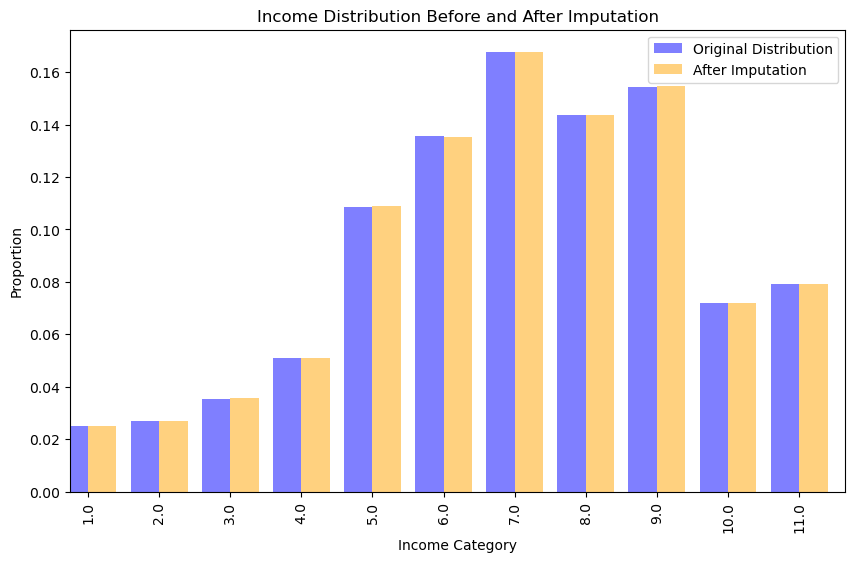

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Income Category')
plt.ylabel('Proportion')
plt.title('Income Distribution Before and After Imputation')
plt.legend()
plt.show()


In [16]:


df['FLUSHOT7'] = df['FLUSHOT7'].replace([7, 9], pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['FLUSHOT7'].notna()]
    .groupby(['_AGEG5YR', '_STATE'])['FLUSHOT7']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_place(row):
    if pd.isna(row['FLUSHOT7']):
        try:
            age_state_probs = age_state_dist.loc[(row['AGE'], row['STATE'])]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['FLUSHOT7'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['FLUSHOT7']



_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7    23559
HIVTST7     22536
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6        0
dtype: int64


In [17]:
original_dist = df['FLUSHOT7'].value_counts(normalize=True)
df['FLUSHOT7'] = df.apply(impute_place, axis=1)

imputed_dist = df['FLUSHOT7'].value_counts(normalize=True)


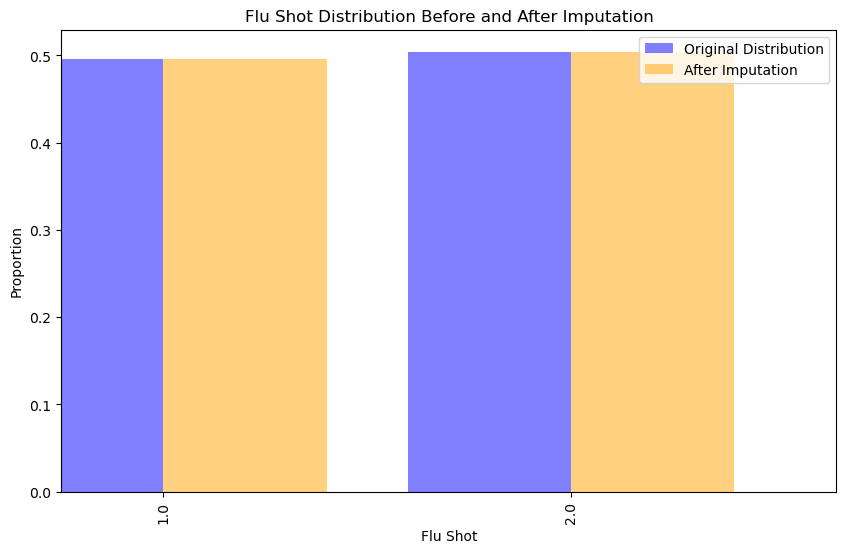

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Flu Shot')
plt.ylabel('Proportion')
plt.title('Flu Shot Distribution Before and After Imputation')
plt.legend()
plt.show()


In [19]:

df['HIVTST7'] = df['HIVTST7'].replace([7, 9], pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['HIVTST7'].notna()]
    .groupby(['_AGEG5YR'])['HIVTST7']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_hiv(row):
    if pd.isna(row['HIVTST7']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['HIVTST7'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['HIVTST7']


_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7        0
HIVTST7     40582
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6        0
dtype: int64


In [20]:
original_dist = df['HIVTST7'].value_counts(normalize=True)
df['HIVTST7'] = df.apply(impute_hiv, axis=1)

imputed_dist = df['HIVTST7'].value_counts(normalize=True)

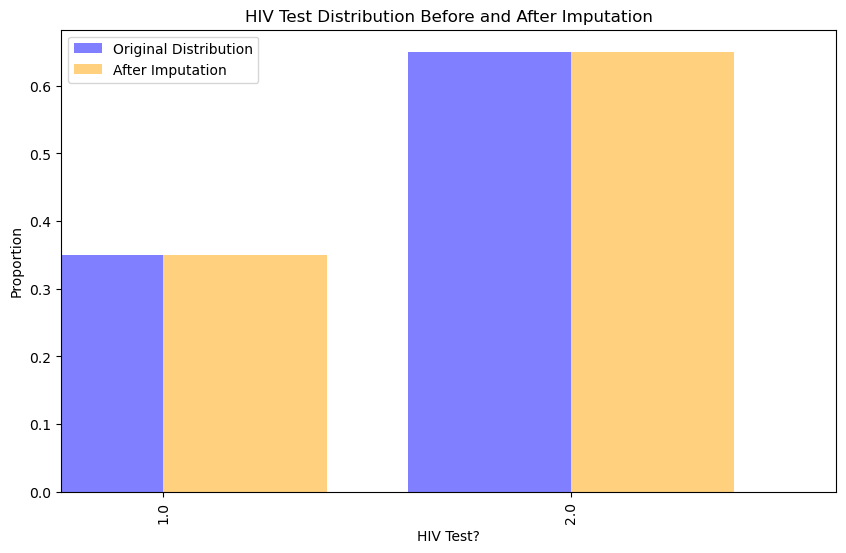

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('HIV Test?')
plt.ylabel('Proportion')
plt.title('HIV Test Distribution Before and After Imputation')
plt.legend()
plt.show()


In [22]:
df['PHYSHLTH'] = df['PHYSHLTH'].replace(88, 0)
df['PHYSHLTH'] = df['PHYSHLTH'].replace([77, 99], pd.NA)
print(df.isnull().sum())

_STATE      0
GENHLTH     0
PHYSHLTH    0
MENTHLTH    0
DIABETE4    0
MARITAL     0
EDUCA       0
EMPLOY1     0
INCOME3     0
FLUSHOT7    0
HIVTST7     0
_HLTHPL1    0
_TOTINDA    0
_RACEGR3    0
_AGEG5YR    0
_EDUCAG     0
_SMOKER3    0
DRNKANY6    0
_RFBING6    0
dtype: int64


C:\Users\skitt\AppData\Local\Temp\ipykernel_29176\3282017981.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PHYSHLTH'] = df['PHYSHLTH'].replace(88, 0)


In [23]:
age_state_dist = (
    df[df['PHYSHLTH'].notna()]
    .groupby(['_AGEG5YR'])['PHYSHLTH']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_phys(row):
    if pd.isna(row['PHYSHLTH']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['PHYSHLTH'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['PHYSHLTH']


In [24]:
original_dist = df['PHYSHLTH'].value_counts(normalize=True)
df['PHYSHLTH'] = df.apply(impute_phys, axis=1)

imputed_dist = df['PHYSHLTH'].value_counts(normalize=True)

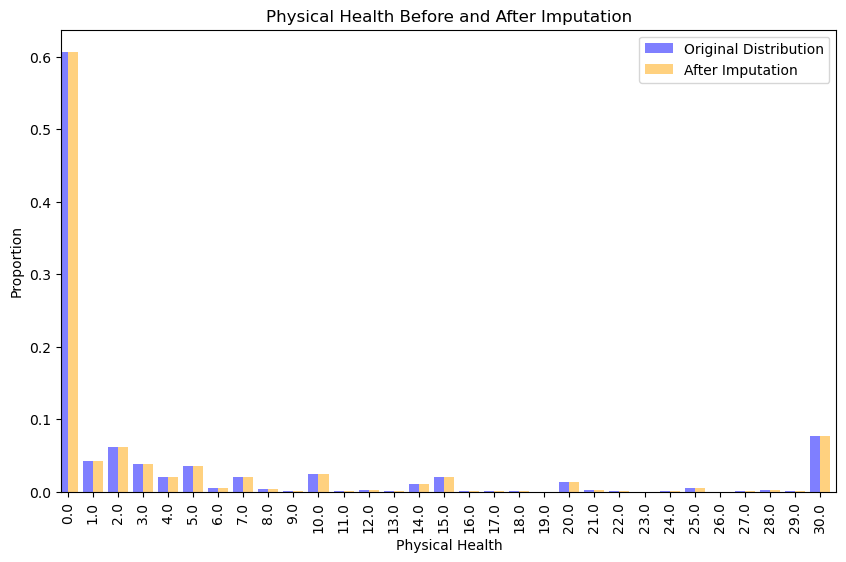

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Physical Health')
plt.ylabel('Proportion')
plt.title('Physical Health Before and After Imputation')
plt.legend()
plt.show()


In [26]:

df['DRNKANY6'] = df['DRNKANY6'].replace([7, 9], pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['DRNKANY6'].notna()]
    .groupby(['_AGEG5YR'])['DRNKANY6']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_drink(row):
    if pd.isna(row['DRNKANY6']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['DRNKANY6'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['DRNKANY6']


_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7        0
HIVTST7         0
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6    22043
_RFBING6        0
dtype: int64


In [27]:
original_dist = df['DRNKANY6'].value_counts(normalize=True)
df['DRNKANY6'] = df.apply(impute_drink, axis=1)
imputed_dist = df['DRNKANY6'].value_counts(normalize=True)

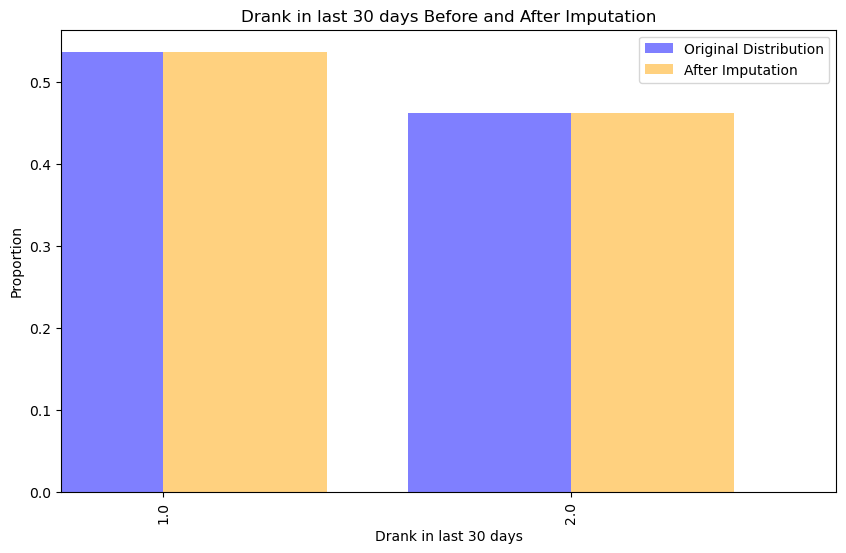

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Drank in last 30 days')
plt.ylabel('Proportion')
plt.title('Drank in last 30 days Before and After Imputation')
plt.legend()
plt.show()


In [29]:

df['_RFBING6'] = df['_RFBING6'].replace(9, pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['_RFBING6'].notna()]
    .groupby(['_AGEG5YR'])['_RFBING6']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_binge(row):
    if pd.isna(row['_RFBING6']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['_RFBING6'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['_RFBING6']

_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7        0
HIVTST7         0
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6    24775
dtype: int64


In [30]:
original_dist = df['_RFBING6'].value_counts(normalize=True)
df['_RFBING6'] = df.apply(impute_binge, axis=1)
imputed_dist = df['_RFBING6'].value_counts(normalize=True)

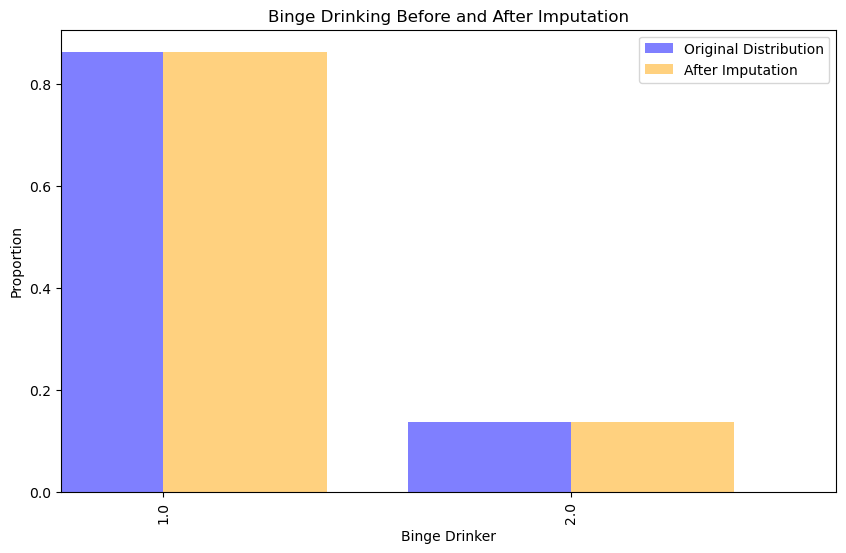

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Binge Drinker')
plt.ylabel('Proportion')
plt.title('Binge Drinking Before and After Imputation')
plt.legend()
plt.show()


In [32]:

df['_SMOKER3'] = df['_SMOKER3'].replace(9, pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['_SMOKER3'].notna()]
    .groupby(['_AGEG5YR'])['_SMOKER3']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_smoke(row):
    if pd.isna(row['_SMOKER3']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['_SMOKER3'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['_SMOKER3']

_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7        0
HIVTST7         0
_HLTHPL1        0
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3    16348
DRNKANY6        0
_RFBING6        0
dtype: int64


In [33]:
original_dist = df['_SMOKER3'].value_counts(normalize=True)
df['_SMOKER3'] = df.apply(impute_smoke, axis=1)
imputed_dist = df['_SMOKER3'].value_counts(normalize=True)

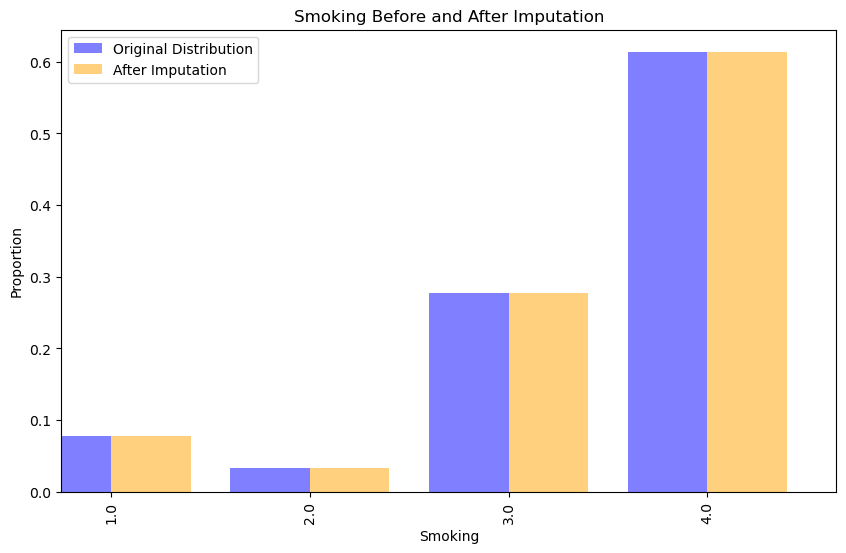

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Smoking')
plt.ylabel('Proportion')
plt.title('Smoking Before and After Imputation')
plt.legend()
plt.show()

In [35]:
df['_HLTHPL1'] = df['_HLTHPL1'].replace(9, pd.NA)
print(df.isnull().sum())
age_state_dist = (
    df[df['_HLTHPL1'].notna()]
    .groupby(['_AGEG5YR'])['_HLTHPL1']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

def impute_insure(row):
    if pd.isna(row['_HLTHPL1']):
        try:
            age_state_probs = age_state_dist.loc[row['AGE']]
            return np.random.choice(age_state_probs.index, p=age_state_probs.values)
        except KeyError:
            overall_probs = df['_HLTHPL1'].value_counts(normalize=True)
            return np.random.choice(overall_probs.index, p=overall_probs.values)
    else:
        return row['_HLTHPL1']

_STATE          0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
DIABETE4        0
MARITAL         0
EDUCA           0
EMPLOY1         0
INCOME3         0
FLUSHOT7        0
HIVTST7         0
_HLTHPL1    13559
_TOTINDA        0
_RACEGR3        0
_AGEG5YR        0
_EDUCAG         0
_SMOKER3        0
DRNKANY6        0
_RFBING6        0
dtype: int64


In [36]:
original_dist = df['_HLTHPL1'].value_counts(normalize=True)
df['_HLTHPL1'] = df.apply(impute_insure, axis=1)
imputed_dist = df['_HLTHPL1'].value_counts(normalize=True)

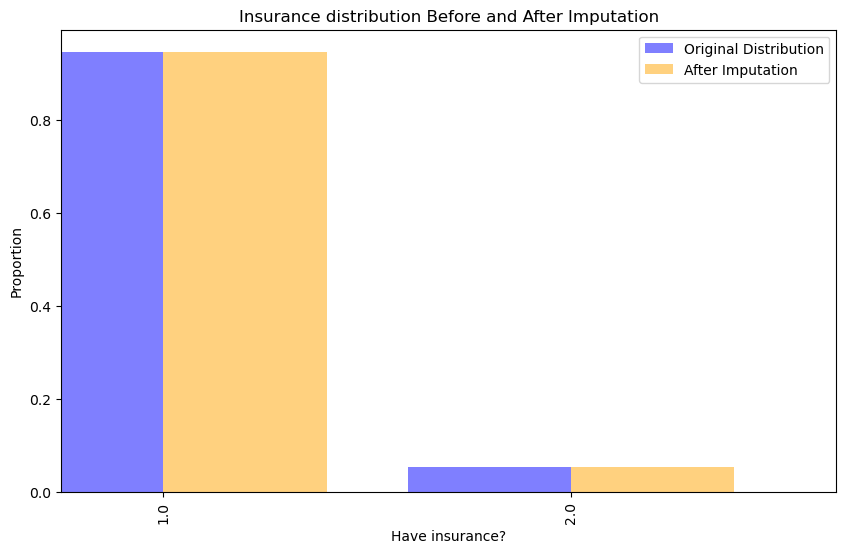

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
original_dist.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Original Distribution', width=0.4, position=1, ax=ax)
imputed_dist.sort_index().plot(kind='bar', alpha=0.5, color='orange', label='After Imputation', width=0.4, position=0, ax=ax)

plt.xlabel('Have insurance?')
plt.ylabel('Proportion')
plt.title('Insurance distribution Before and After Imputation')
plt.legend()
plt.show()

In [38]:
print(df.isnull().sum())

_STATE      0
GENHLTH     0
PHYSHLTH    0
MENTHLTH    0
DIABETE4    0
MARITAL     0
EDUCA       0
EMPLOY1     0
INCOME3     0
FLUSHOT7    0
HIVTST7     0
_HLTHPL1    0
_TOTINDA    0
_RACEGR3    0
_AGEG5YR    0
_EDUCAG     0
_SMOKER3    0
DRNKANY6    0
_RFBING6    0
dtype: int64
